## Diabetes_Prediction

In [27]:
# importing required pacakges 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import pickle
warnings.filterwarnings("ignore")

In [2]:
# loading data
data=pd.read_csv("diabetes_dataset.csv")

In [3]:
# first five rows of the data 
data.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [4]:
# total records and features in dataset 
print("Total records in dataset:",data.shape[0])
print("Total features in dataset:",data.shape[1])

Total records in dataset: 9538
Total features in dataset: 17


In [5]:
# checking dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [6]:
# checking unique values in each feature 
unique_values={col:data[col].unique() for col in data.columns}
unique_values

{'Age': array([69, 32, 89, 78, 38, 41, 20, 39, 70, 19, 47, 55, 81, 77, 50, 75, 66,
        76, 59, 79, 64, 68, 72, 24, 56, 35, 21, 31, 26, 88, 61, 25, 52, 53,
        67, 23, 71, 80, 51, 65, 57, 43, 58, 46, 62, 82, 18, 28, 22, 45, 29,
        40, 54, 44, 60, 30, 49, 83, 74, 87, 73, 36, 85, 34, 86, 33, 37, 84,
        48, 42, 63, 27], dtype=int64),
 'Pregnancies': array([ 5,  1, 13,  8, 10, 16,  4,  3,  0, 15, 12,  6, 11,  7,  9,  2, 14],
       dtype=int64),
 'BMI': array([28.39, 26.49, 25.34, ..., 36.39, 34.91, 44.62]),
 'Glucose': array([130.1, 116.5, 101. , ..., 161.2, 167. ,  52.7]),
 'BloodPressure': array([ 77.,  72.,  82., 104.,  74.,  71.,  60.,  94.,  90.,  62.,  93.,
         87., 101.,  95., 106.,  88.,  81.,  79., 107.,  86.,  64., 100.,
         67.,  96.,  73.,  75.,  91.,  80.,  98.,  69.,  83.,  89.,  76.,
        117.,  92.,  85., 120., 103.,  63., 110.,  78.,  65., 113., 108.,
         99.,  84.,  70., 102.,  66., 109.,  97.,  61., 115., 111.,  68.,
        126., 119.

In [7]:
# checking stats 
data[["Age","Pregnancies","BMI","Glucose","BloodPressure","HbA1c","LDL","HDL","Triglycerides","WaistCircumference","HipCircumference","WHR"]].describe()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000


In [8]:
# checking for null values in dataset 
data.isnull().sum()

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

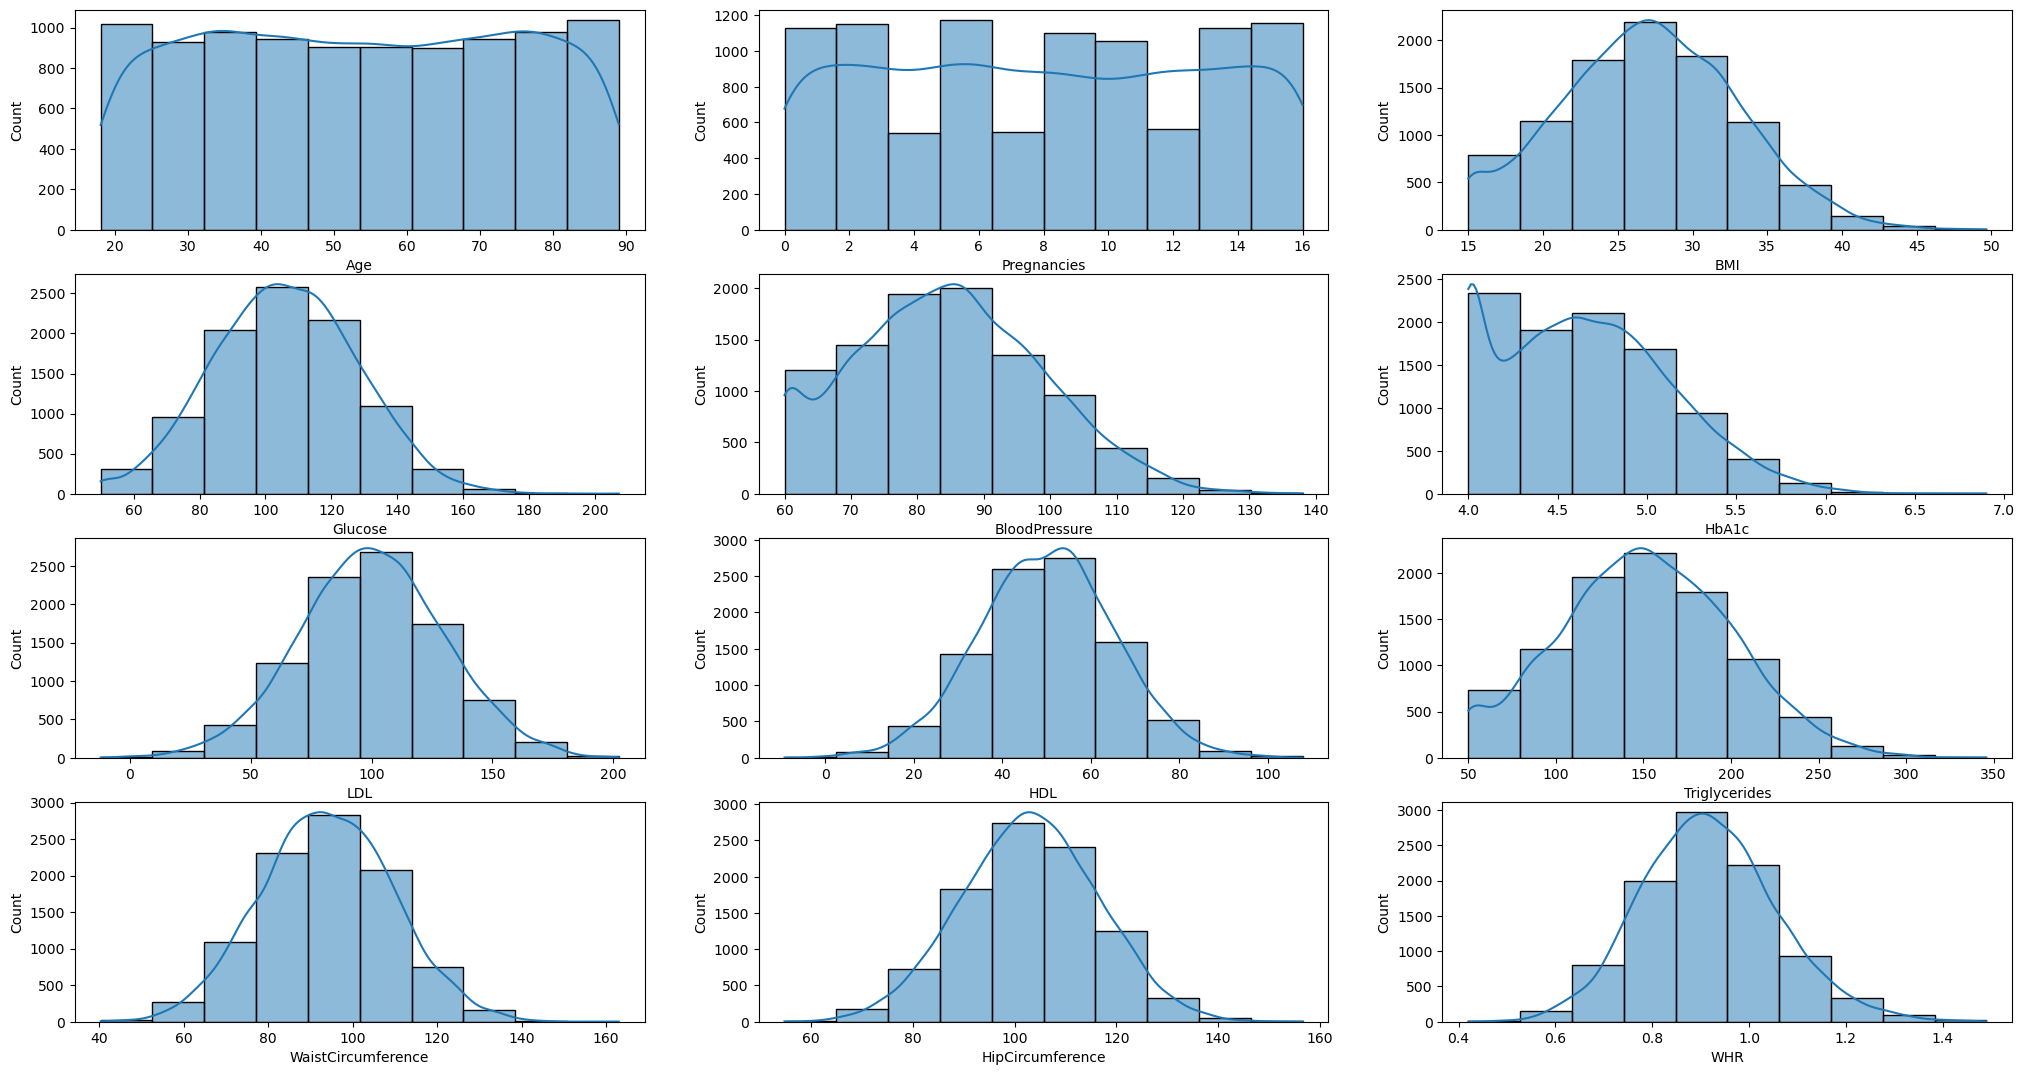

In [9]:
# plotting numeric distribution
plt.figure(figsize=(25,20))
plt.subplot(6,3,1)
sns.histplot(data["Age"],kde=True,bins=10)
plt.subplot(6,3,2)
sns.histplot(data["Pregnancies"],kde=True,bins=10)
plt.subplot(6,3,3)
sns.histplot(data["BMI"],kde=True,bins=10)
plt.subplot(6,3,4)
sns.histplot(data["Glucose"],kde=True,bins=10)
plt.subplot(6,3,5)
sns.histplot(data["BloodPressure"],kde=True,bins=10)
plt.subplot(6,3,6)
sns.histplot(data["HbA1c"],kde=True,bins=10)
plt.subplot(6,3,7)
sns.histplot(data["LDL"],kde=True,bins=10)
plt.subplot(6,3,8)
sns.histplot(data["HDL"],kde=True,bins=10)
plt.subplot(6,3,9)
sns.histplot(data["Triglycerides"],kde=True,bins=10)
plt.subplot(6,3,10)
sns.histplot(data["WaistCircumference"],kde=True,bins=10)
plt.subplot(6,3,11)
sns.histplot(data["HipCircumference"],kde=True,bins=10)
plt.subplot(6,3,12)
sns.histplot(data["WHR"],kde=True,bins=10)
plt.show()

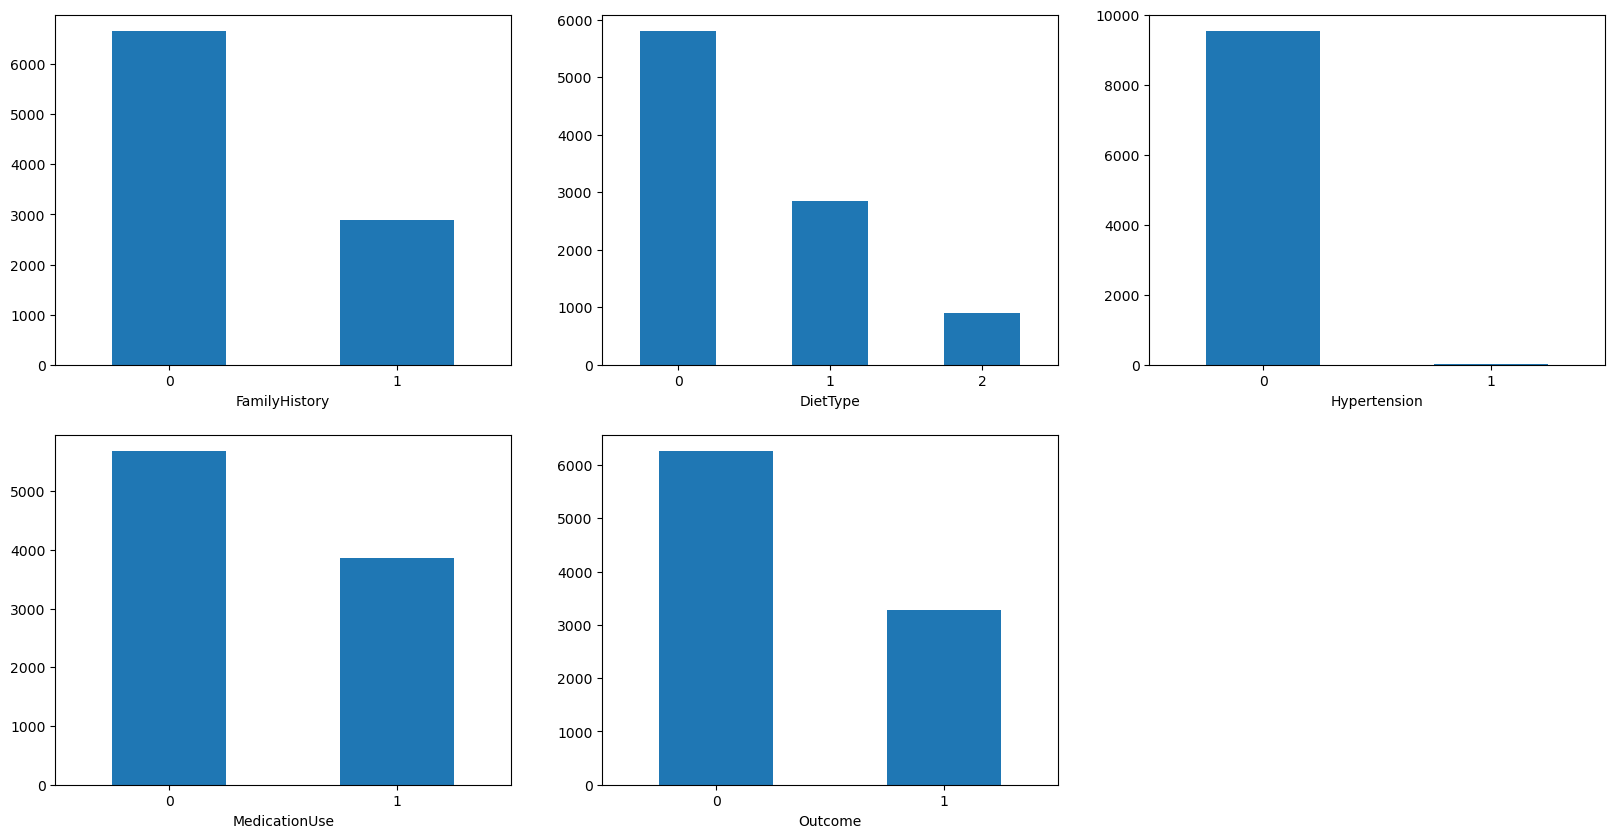

In [10]:
# plotting categorical distribution 
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
data["FamilyHistory"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,3,2)
data["DietType"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,3,3)
data["Hypertension"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,3,4)
data["MedicationUse"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,3,5)
data["Outcome"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

In [11]:
data["Outcome"].value_counts()

Outcome
0    6256
1    3282
Name: count, dtype: int64

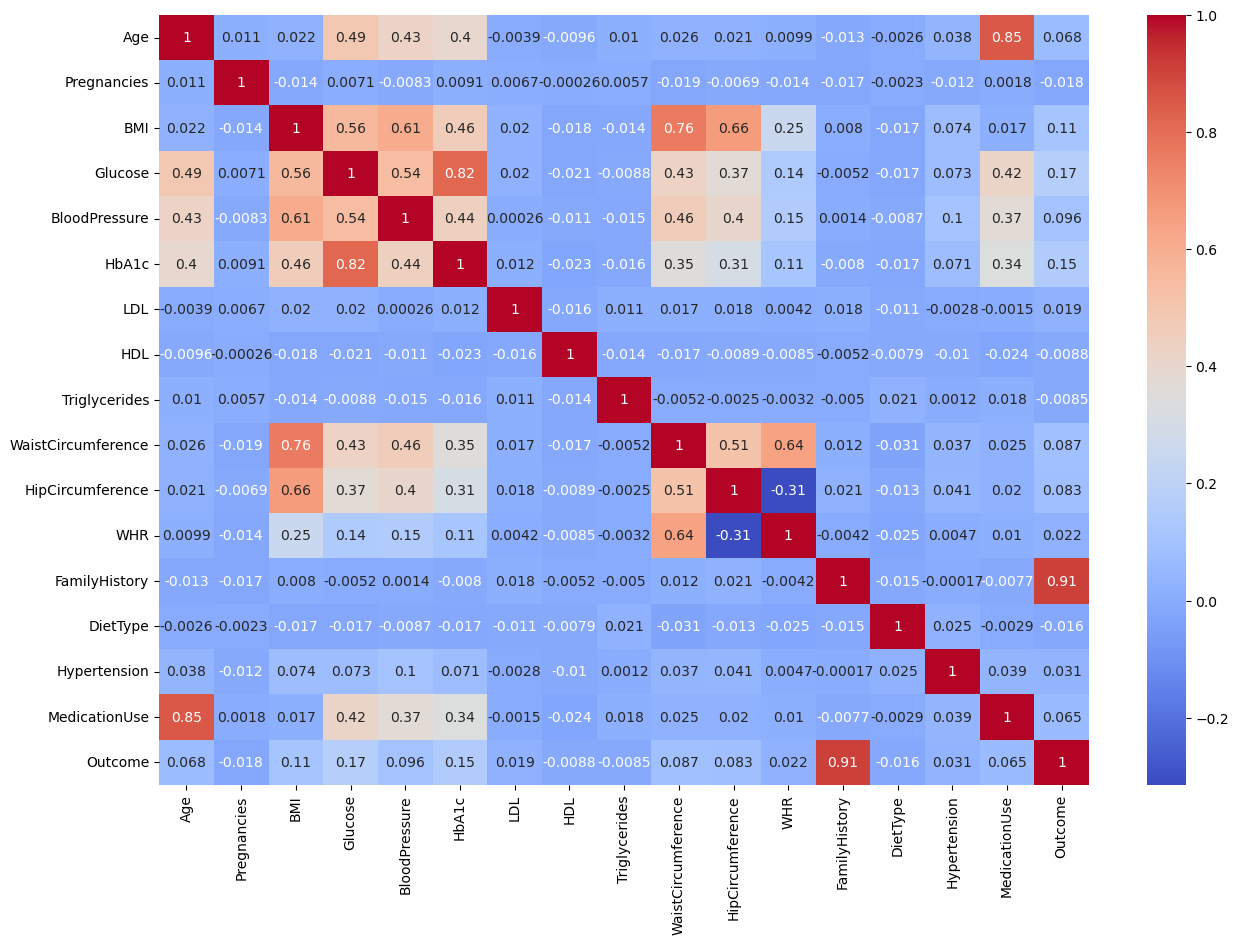

In [12]:
# checking correlation between features
corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [13]:
# dropping irrelevant features
data.drop(["Pregnancies","LDL","HDL","Triglycerides","WHR","DietType"],axis=1,inplace=True)

In [15]:
# divide data into input and and target variable 
x=data.iloc[:,:10]
y=data.iloc[:,10:]

In [16]:
x.head()

,Age,BMI,Glucose,BloodPressure,HbA1c,WaistCircumference,HipCircumference,FamilyHistory,Hypertension,MedicationUse
0,69,28.39,130.1,77.0,5.4,90.5,107.9,0,0,1
1,32,26.49,116.5,72.0,4.5,113.3,81.4,0,0,0
2,89,25.34,101.0,82.0,4.9,84.7,107.2,0,0,1
3,78,29.91,146.0,104.0,5.7,108.9,110.0,0,0,1
4,38,24.56,103.2,74.0,4.7,84.1,92.8,0,0,0


In [17]:
y.head()

,Outcome
0,0
1,0
2,0
3,1
4,0


In [18]:
# split data into train test split 
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
# data shape of train and test 
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(7630, 10)
(7630, 1)
(1908, 10)
(1908, 1)


In [20]:
# smote for oversampling because dataset is imbalanced
from imblearn.over_sampling import SMOTE 
sample=SMOTE() 
train_x,train_y=sample.fit_resample(train_x,train_y)

In [21]:
train_y.value_counts()

Outcome
0          4981
1          4981
Name: count, dtype: int64

In [22]:
# scaling data by using StandardScaler
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit(train_x) 
train_x_scale=scale.transform(train_x)
test_x_scale=scale.transform(test_x)

# Model Training

In [23]:
# importing classification models 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.svm import SVC 

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [25]:
# creating function of the metrics 
def get_metrics(actual,predicted): 
    acc=accuracy_score(actual,predicted)
    cof=confusion_matrix(actual,predicted)
    pr=precision_score(actual,predicted)
    re=recall_score(actual,predicted)
    f1=f1_score(actual,predicted)
    roc_auc=roc_auc_score(actual,predicted)
    return acc,cof,pr,re,f1,roc_auc

In [26]:
# Define a dictionary of various regression models 
models={
    "LogisticRegression":LogisticRegression(), 
    "DecisionTreeClassifier":DecisionTreeClassifier(), 
    "RandomForestClassifier":RandomForestClassifier(), 
    "AdaBoostClassifier":AdaBoostClassifier(), 
    "GradientBoostingClassifier":GradientBoostingClassifier(), 
    "XGBClassifier":XGBClassifier(), 
    "KNeighborsClassifier":KNeighborsClassifier(), 
    "naive_bayes":BernoulliNB(), 
    "SVC":SVC()
}
# Iterate through each model to train and evaluate
for i in range(len(list(models))): 
    model=list(models.values())[i]
    model.fit(train_x_scale,train_y)
    # Generate predictions for both training and test data
    train_pred=model.predict(train_x_scale)
    test_pred=model.predict(test_x_scale) 

    # Evaluate training predictions using custom metrics function
    train_acc,train_cof,train_pr,train_re,train_f1,train_roc_auc=get_metrics(train_y,train_pred)
    # Evaluate test predictions using custom metrics function
    test_acc,test_cof,test_pr,test_re,test_f1,test_roc_auc=get_metrics(test_y,test_pred)

    # Print the model name and performance metrics
    print(list(models.keys())[i])
    print("------------------------------")
    print("Training data:")
    print("****************")
    print("accuracy_score:",train_acc)
    print("confusion_matrix:\n",train_cof)
    print("precision_score:",train_pr)
    print("recall_score:",train_re)
    print("f1_score:",train_f1)
    print("roc_auc_score:",train_roc_auc)
    print("-------------------------------------------------")
    print("Testing data:")
    print("****************")
    print("accuracy_score:",test_acc)
    print("confusion_matrix:\n",test_cof)
    print("precision_score:",test_pr)
    print("recall_score:",test_re)
    print("f1_score:",test_f1)
    print("roc_auc_score:",test_roc_auc)
    print("============================================================================")
    print("\n")




LogisticRegression
------------------------------
Training data:
****************
accuracy_score: 0.9952820718731179
confusion_matrix:
 [[4956   25]
 [  22 4959]]
precision_score: 0.994983948635634
recall_score: 0.9955832162216423
f1_score: 0.9952834922227797
roc_auc_score: 0.9952820718731179
-------------------------------------------------
Testing data:
****************
accuracy_score: 0.9963312368972747
confusion_matrix:
 [[1270    5]
 [   2  631]]
precision_score: 0.9921383647798742
recall_score: 0.9968404423380727
f1_score: 0.9944838455476753
roc_auc_score: 0.9964594368553108


DecisionTreeClassifier
------------------------------
Training data:
****************
accuracy_score: 1.0
confusion_matrix:
 [[4981    0]
 [   0 4981]]
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
roc_auc_score: 1.0
-------------------------------------------------
Testing data:
****************
accuracy_score: 0.999475890985325
confusion_matrix:
 [[1274    1]
 [   0  633]]
precision_score: 0.998422

## Model Selection Summary: AdaBoostClassifier
After evaluating multiple classification models, AdaBoostClassifier was selected as the best-performing model. It achieved high accuracy, precision, recall, and F1-score on both the training and testing datasets. Unlike some models such as DecisionTree or RandomForest that showed signs of overfitting (100% training accuracy), AdaBoost delivered strong generalization performance with a test accuracy of 99.95% while avoiding overfitting.

Additionally, the model performed exceptionally well without any hyperparameter tuning, making it an ideal choice for this task due to its robustness, efficiency, and stability right out of the box.

## Final model

In [28]:
#  Fitting the final model
final_model=AdaBoostClassifier() 
final_model.fit(train_x_scale,train_y)

AdaBoostClassifier()

In [29]:
# Making predictions on the scaled train and test set
final_pred_train=final_model.predict(train_x_scale)
final_pred_test=final_model.predict(test_x_scale)

In [32]:
# Evaluating the model's performance using a custom metrics function
train_acc,train_cof,train_pr,train_re,train_f1,train_roc_auc=get_metrics(train_y,final_pred_train)
test_acc,test_cof,test_pr,test_re,test_f1,test_roc_auc=get_metrics(test_y,final_pred_test)
print(list(models.keys())[i])
print("------------------------------")
print("Training data:")
print("****************")
print("accuracy_score:",train_acc)
print("confusion_matrix:\n",train_cof)
print("precision_score:",train_pr)
print("recall_score:",train_re)
print("f1_score:",train_f1)
print("roc_auc_score:",train_roc_auc)
print("-------------------------------------------------")
print("Testing data:")
print("****************")
print("accuracy_score:",test_acc)
print("confusion_matrix:\n",test_cof)
print("precision_score:",test_pr)
print("recall_score:",test_re)
print("f1_score:",test_f1)
print("roc_auc_score:",test_roc_auc)
print("============================================================================")
print("\n")

SVC
------------------------------
Training data:
****************
accuracy_score: 0.9992973298534431
confusion_matrix:
 [[4980    1]
 [   6 4975]]
precision_score: 0.9997990353697749
recall_score: 0.9987954226059025
f1_score: 0.9992969770011048
roc_auc_score: 0.9992973298534432
-------------------------------------------------
Testing data:
****************
accuracy_score: 0.999475890985325
confusion_matrix:
 [[1274    1]
 [   0  633]]
precision_score: 0.998422712933754
recall_score: 1.0
f1_score: 0.9992107340173638
roc_auc_score: 0.9996078431372549




In [35]:
# plotting roc auc cruve
from sklearn.metrics import roc_curve,auc 
fpr,tpr,thershold=roc_curve(test_y,final_pred_test)
roc_auc=auc(fpr,tpr)

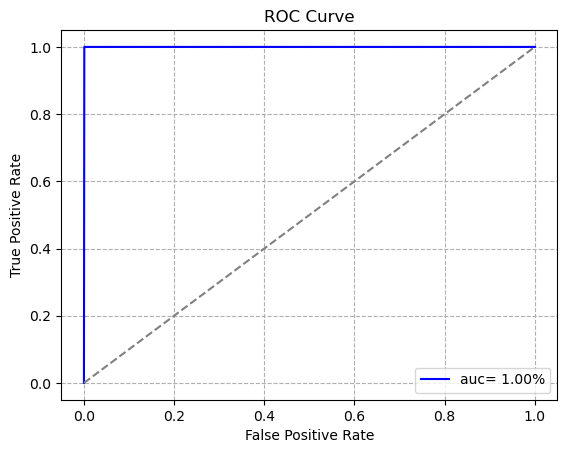

In [39]:
plt.plot(fpr,tpr,color="blue",label="auc= %0.2f%%"%roc_auc)
plt.plot([0,1],[0,1],color="gray",linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(linestyle="dashed")
plt.show()

In [33]:
# saving models
with open("scaler.pkl","wb")as file: 
    pickle.dump(scale,file)
with open("model.pkl","wb")as file: 
    pickle.dump(final_model,file)